<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/NeuralNetwrks/INN_Learner_Notebook_Full_code_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [176]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import L2

# importing SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score, f1_score,accuracy_score,precision_score

import random
import time


# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ds = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi4_NeuralNetwrks/Pi4_Project/bank-1.csv")

## Data Overview

In [4]:
## Viewing sample
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Checking Shape (dimension of the given input data)
ds.shape

(10000, 14)

##### Observation
- Total of 10K records with 14 columns

#####Info

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###### Observation
- float64(2), int64(9), object(3)
 - 3 object types need to be converted to categorical

#####Describe

In [7]:
ds.describe().apply(lambda s: s.apply('{:,.0f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000","5,000","2,887",1,"2,501","5,000","7,500","10,000"
CustomerId,"10,000","15,690,941","71,936","15,565,701","15,628,528","15,690,738","15,753,234","15,815,690"
CreditScore,"10,000",651,97,350,584,652,718,850
Age,"10,000",39,10,18,32,37,44,92
Tenure,"10,000",5,3,0,3,5,7,10
Balance,"10,000","76,486","62,397",0,0,"97,199","127,644","250,898"
NumOfProducts,"10,000",2,1,1,1,1,2,4
HasCrCard,"10,000",1,0,0,0,1,1,1
IsActiveMember,"10,000",1,0,0,0,1,1,1
EstimatedSalary,"10,000","100,090","57,510",12,"51,002","100,194","149,388","199,992"


######Observation
- Age min is 18 and max is 92 and mean is 39
- Balance min is 0 and max 250K and mean is at 76K
- Credit Score mean is at 651 and min of 350 and max of 850

#####IsNULL

In [8]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


######Observation
- No Null

#####Duplicated

In [9]:
ds.duplicated().sum()

np.int64(0)

######Observation
- No duplicates

#####IsNA

In [10]:
ds.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


######Observation
- No NA records

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#####Credit Score

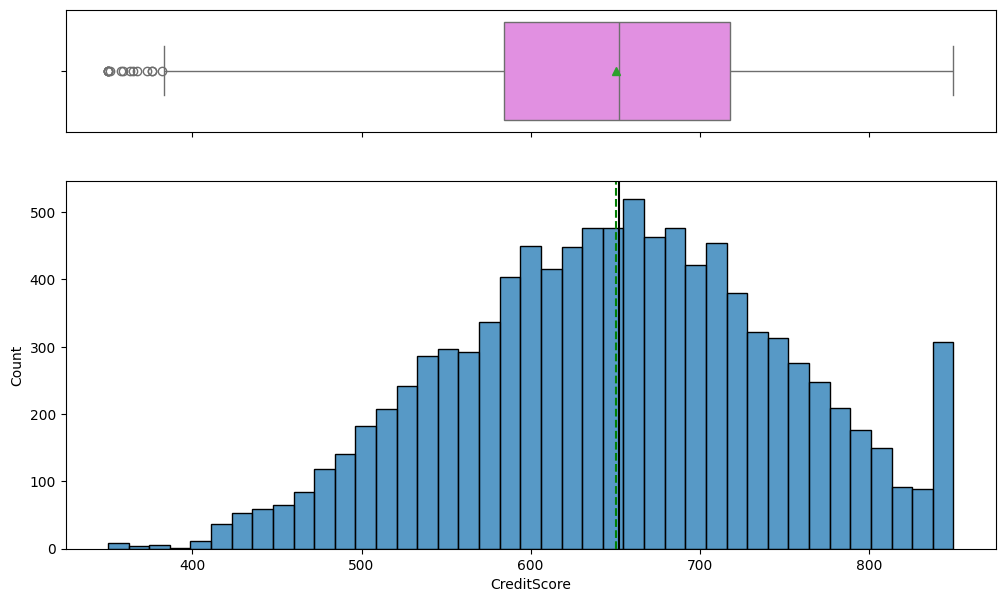

In [12]:
histogram_boxplot(ds,'CreditScore')

######Observation
- Seems to be a normal distribution
- Mean is at 650
- Also we can see a lot of customers with in the 850 bucket

#####Age

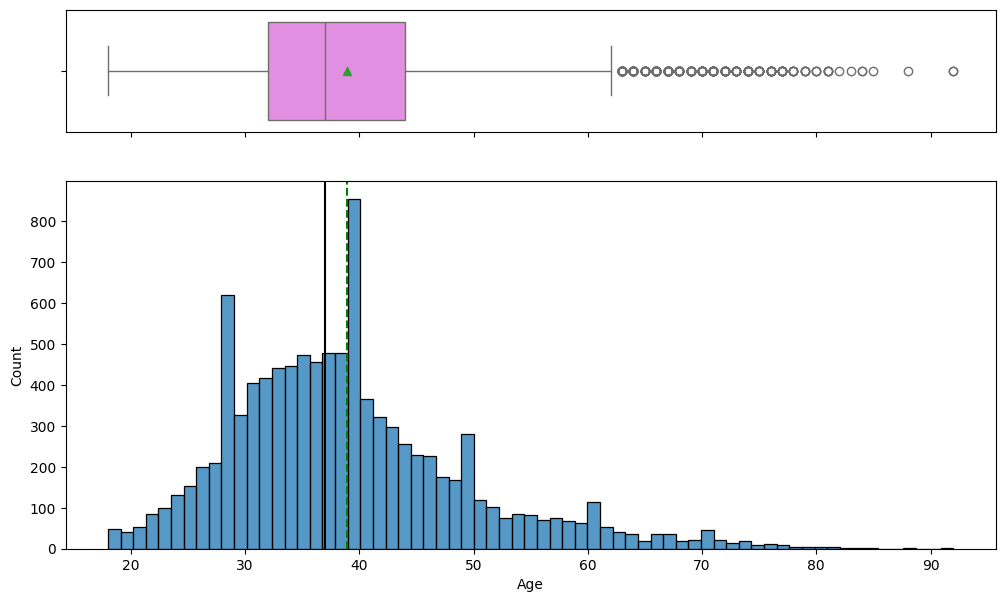

In [13]:
histogram_boxplot(ds, 'Age')

######Observation on Age
- Age is right skewed distribution
- Mean is at 37


#####Balance

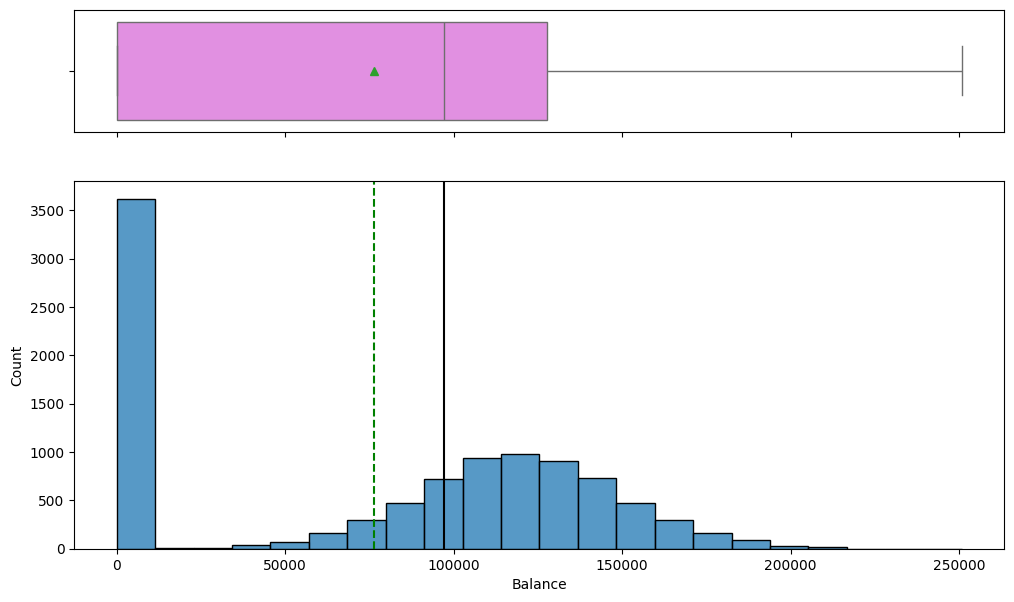

In [14]:
histogram_boxplot(ds, 'Balance')

#######Observation
- Huge customer base of 3.5K are having 0 balance
- Except the Zero balance customer the reaming distribution seems to be a normal

#####Estimated Salary

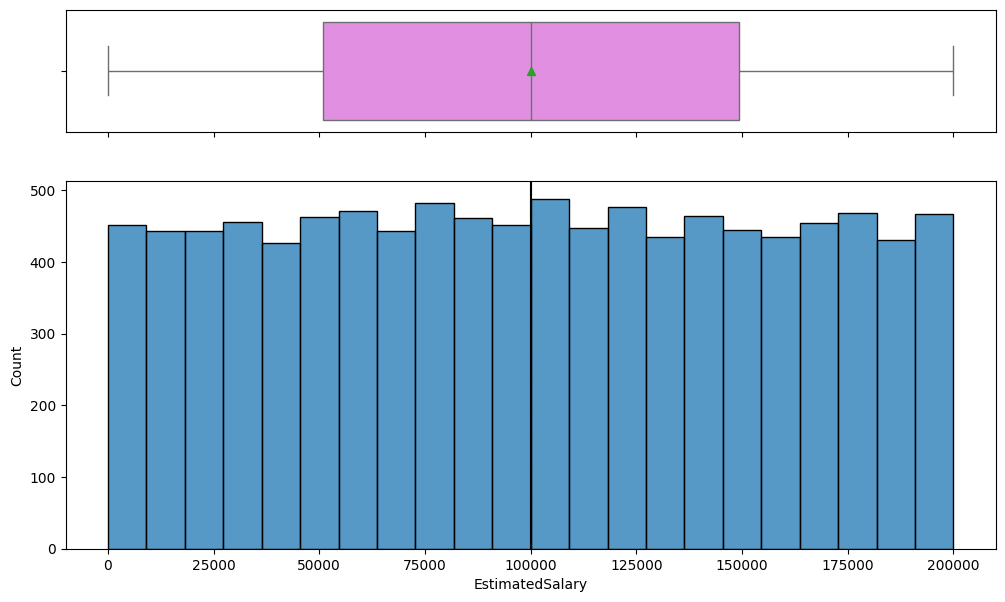

In [15]:
histogram_boxplot(ds, 'EstimatedSalary')

######Observation
- Seems to be uniform distributed across all salary buckets

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
#####Existed

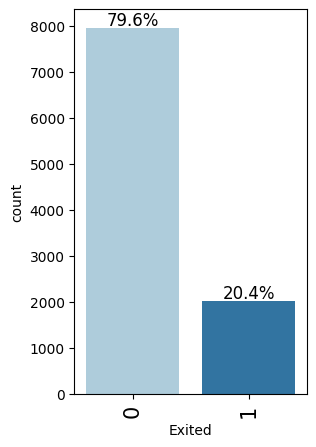

In [18]:
labeled_barplot(ds, "Exited", perc=True)

######Observation
- Imbalanced data of 80:20
- 80% of customers have not existed and only 20% existed

#####Gender

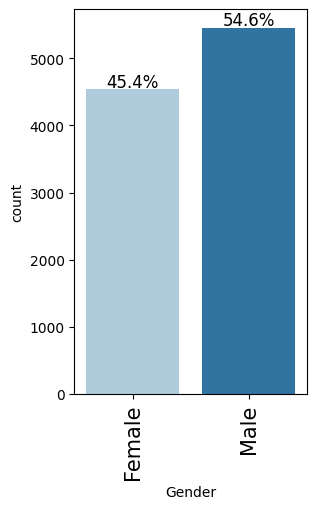

In [19]:
labeled_barplot(ds, 'Gender', perc=True)

######Observation
- Male customers are more than femal

#####Geography

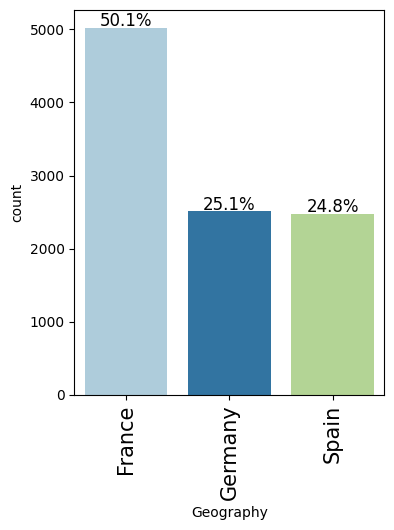

In [20]:
labeled_barplot(ds, 'Geography', perc=True)

######Observation
- France has more customer base for this bank and
- Germany second
- very close spain

#####Tenure

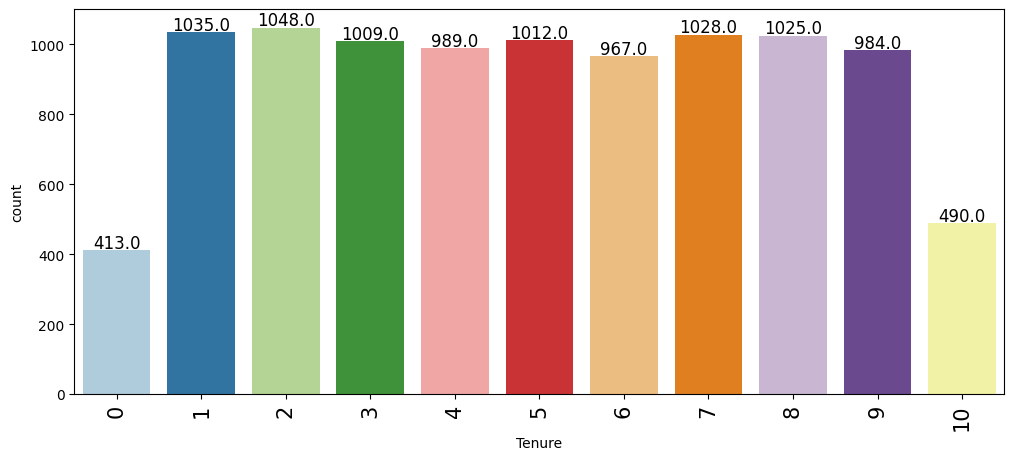

In [21]:
labeled_barplot(ds, 'Tenure')

######Observation
- Almost uniform distribution on tenure from 1 to 9
- Tenure is very less for 10th and 0th bucket
 - Bank could be just 10 years old
 - may be this data of recording should be done mid of year in the current year to have 0 tenure and it would still be execeeding the prior years

######Number of Products

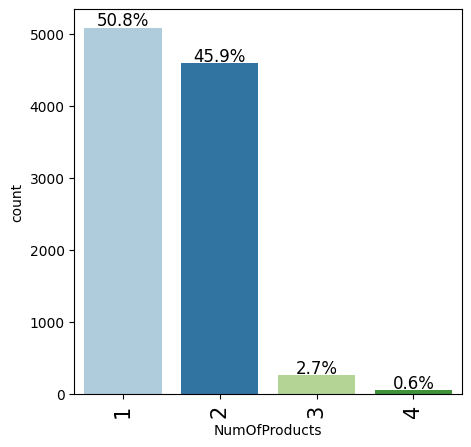

In [22]:
labeled_barplot(ds, 'NumOfProducts', perc=True)

######Observation
- 50% customer at least own one product
- 45% customer own 2 products

#####Has Credit Card

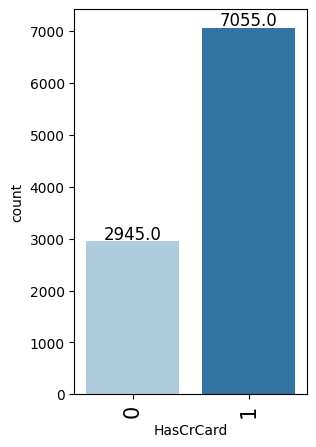

In [23]:
labeled_barplot(ds, 'HasCrCard')

######Observation
- 70% customer has credit card

### Bivariate Analysis

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#####Correlation Plot

In [25]:
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary", "NumOfProducts"]

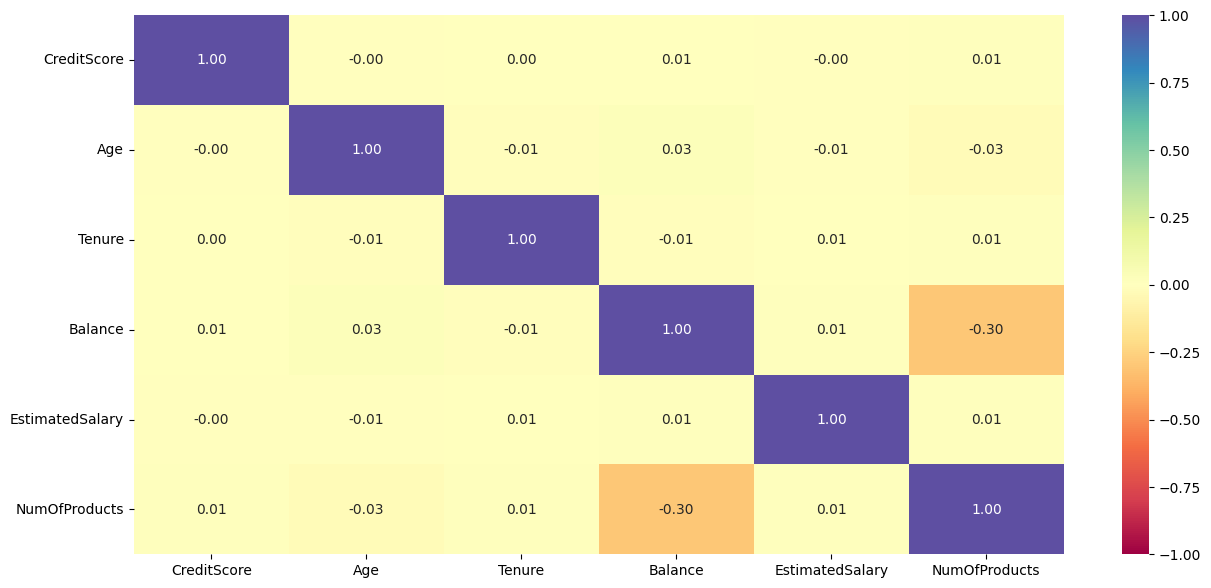

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

######Observation
- Number of products and Balance has inverse correlation
- Mostly all other columns does not vary much with each other

#####Existed Vs Age

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
81         4     0      4
83         1     0      1
85         1     0      1
88         1     0      1
92         2     0      2

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


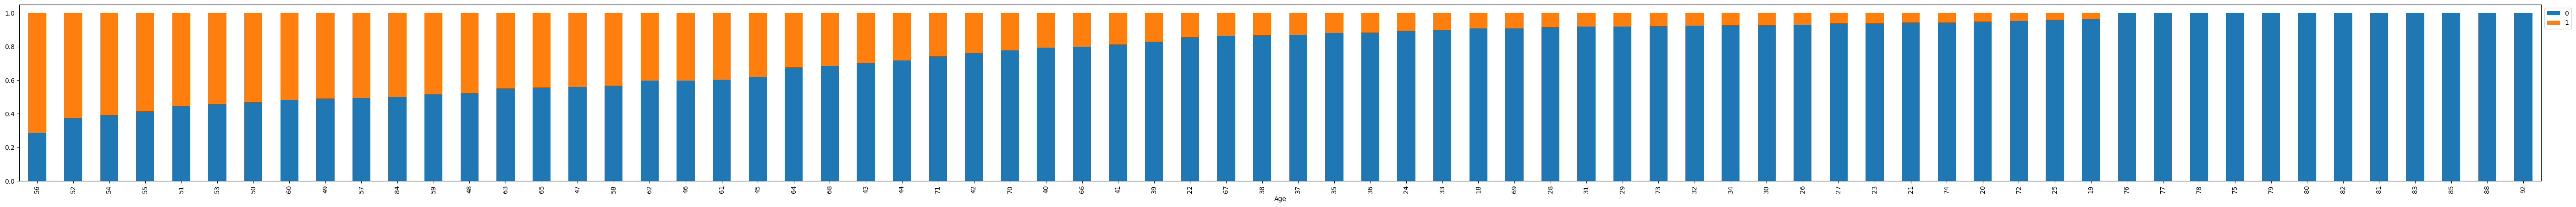

In [27]:
stacked_barplot(ds, "Age", "Exited" )

######Observation
- As the age increases the exist decreses
 - Older the customer Loyal he/she is

#####Existed Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


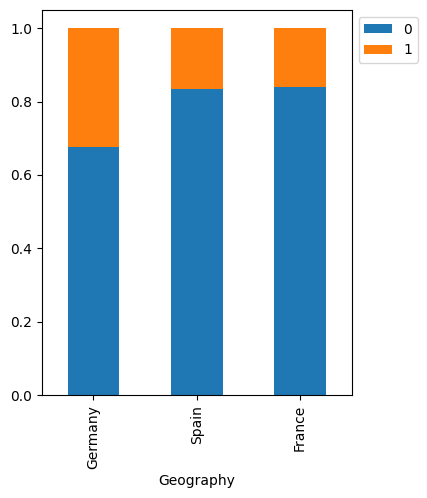

In [28]:
stacked_barplot(ds, "Geography", "Exited" )

######Observation
- Most of the customers existed from Germay
 - Young customers are mostly from Germany

#####Existed Vs IsActionMember

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


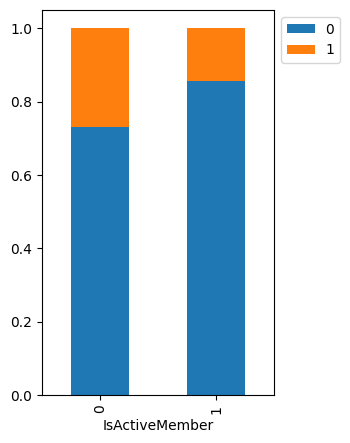

In [29]:
stacked_barplot(ds, 'IsActiveMember', 'Exited')

######Observation
- More active tends to be loyal

#####Existed Vs CreditScore

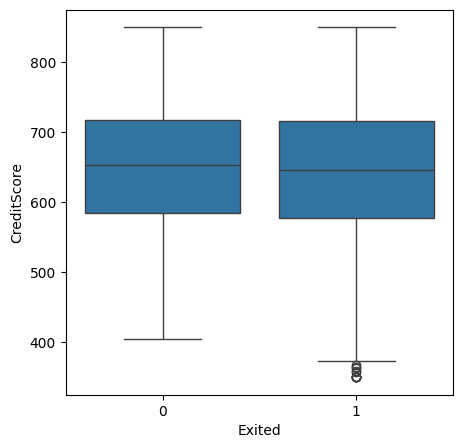

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

######Observation
- Mean of customers existed to that of loyal is same at around 650
- Lower the credit score more customer existed

#####Existed Vs Estimated Salary

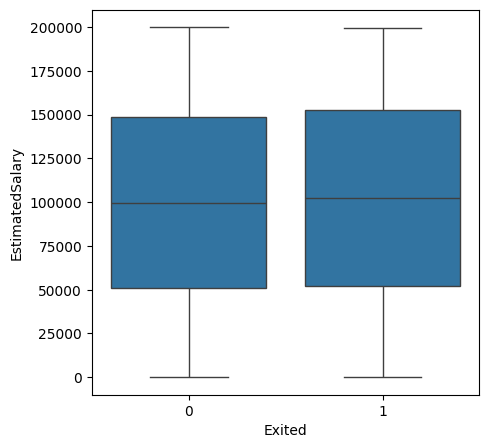

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

######Observation
- Salary should not matter when deciding the loyal customer
- Mean salary is same for both existed and loyal customer at 100K

## Data Preprocessing

### Dummy Variable Creation

In [32]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [33]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [104]:
# Apply log transformation to EstimatedSalary  & Balance
## These two columns have huge range of values and hence applying log transformation to skew well
ds['EstimatedSalary'] = np.log1p(ds['EstimatedSalary'])
# Apply log transformation to Balance (often skewed as well)
ds['Balance'] = np.log1p(ds['Balance'])

### Train-validation-test Split

In [120]:
X = ds.drop(['Exited'],axis=1)
y = ds['Exited']

In [121]:
# Splitting the dataset into the Training and Testing set.

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42,stratify=y,shuffle = True)

In [122]:
# Splitting the dataset into the Training and Testing set.

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42,stratify=y_temp, shuffle = True)

In [123]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [124]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


In [125]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [126]:
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,2.527833,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,2.512546,1.0,0.0,1.0,2.536162,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,2.563472,3.0,1.0,0.0,2.537132,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,2.521658,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,2.544759,1.0,1.0,1.0,2.507832,0.0,0.0,1.0,0.0


### Data Normalization

In [127]:
cols_list

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

In [179]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

In [101]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9098,-1.839666,-0.654359,-0.013143,0.793173,0.792691,1.0,1.0,-0.004775,1.0,0.0,0.0
1358,0.134856,0.395779,1.371826,0.838511,0.792691,1.0,1.0,-0.266410,0.0,0.0,1.0
3621,0.620733,-0.272490,1.371826,0.781984,-0.916898,1.0,1.0,-0.445205,0.0,0.0,1.0
9700,-0.909263,-0.272490,-0.359385,0.789582,0.792691,1.0,1.0,-0.142469,0.0,1.0,0.0
3375,1.303028,1.827786,-0.359385,-1.328757,-0.916898,1.0,1.0,-0.159585,0.0,0.0,0.0


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- For customer churning - model metric would be RECALL
 - We do not want loyal customers leave or disuse any services offered
 - More than FP (False Positive) we need to concentrate on FN (False Negative)
   - FP -> You predict a customer will churn but they actually wont
   - FN -> You predict a customer will not churn but they actually will
 - We could offer more discounts and services but predicted that customer will churn but they actually wont which is waste of marketting team's time and value - but this is ok that its little bit of extra cost to the company
 - But if predicted that customer will not churn and if they churn its a loss of customer and we need to stop missing customers and hence RECALL is choosen as the best metric

### Neural Network with SGD Optimizer

In [294]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int))

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.2557555462536627), 1: np.float64(4.909983633387888)}

In [295]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [296]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [297]:
metric = keras.metrics.Recall()

In [298]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()
tf.keras.backend.clear_session()

In [299]:
def build_model(model, optimizer, predictor_train, target_train ):
  """
  Function to build model and charts as well as to predict

  model : model is a sequential defined model for neural networks
  optimizer: specified optimizer for the model [sgd / adam]
  predictor_train: X_train variable (X_train_smote)
  target_train: y_train variable (y_train_smote)
  """

  # clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
  tf.keras.backend.clear_session()
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric]) # Setting binary entropy as the loss function

  early_stopping = EarlyStopping(
    monitor='val_recall',
    patience=35,          # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore the best weights found during training
  )

  start = time.time()
  history = model.fit(
    predictor_train, target_train,
    batch_size=128,
    validation_data=(X_val,y_val),
    epochs=200,
    verbose=0,
    class_weight=cw_dict,
    callbacks=[early_stopping]
  )
  end=time.time()
  print('Total time taken for the model to run  ==> ', end-start , " secs")
  plot(history,'loss') # Plotting loss graph
  plot(history,'recall') # Plotting recall graph
  #Predicting the results using best as a threshold
  y_train_pred = model.predict(predictor_train)
  y_train_pred = (y_train_pred > 0.5)
  y_train_pred
  #Predicting the results using best as a threshold
  y_val_pred = model.predict(X_val)
  y_val_pred = (y_val_pred > 0.5)
  y_val_pred
  return history


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Total time taken for the model to run  ==>  20.50076675415039  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.771,0.771,0.830393,0.788397


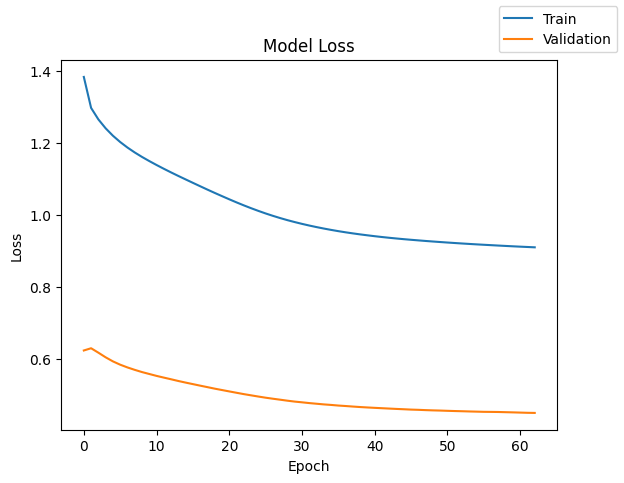

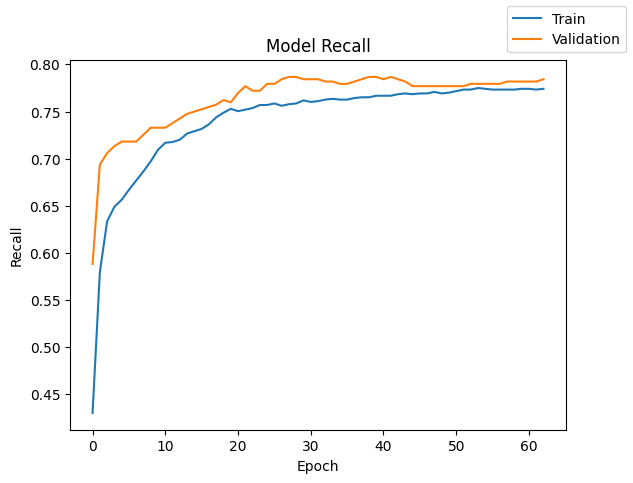

In [326]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))
optimizer_1 = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
build_model(model_1, optimizer_1, X_train, y_train)
model_1_train_perf_name = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf_name

In [330]:
model_1_val_perf_name = model_performance_classification(model_1, X_val, y_val)
model_1_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7695,0.7695,0.837155,0.78807


## Model Performance Improvement

### Neural Network with Adam Optimizer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Total time taken for the model to run  ==>  13.756980657577515  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.763333,0.763333,0.831022,0.782362


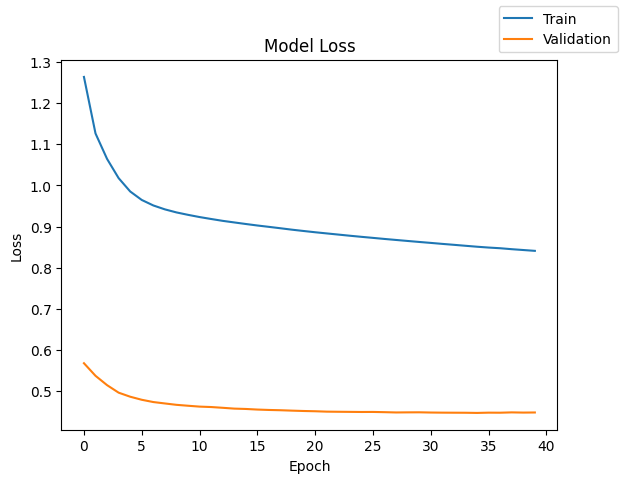

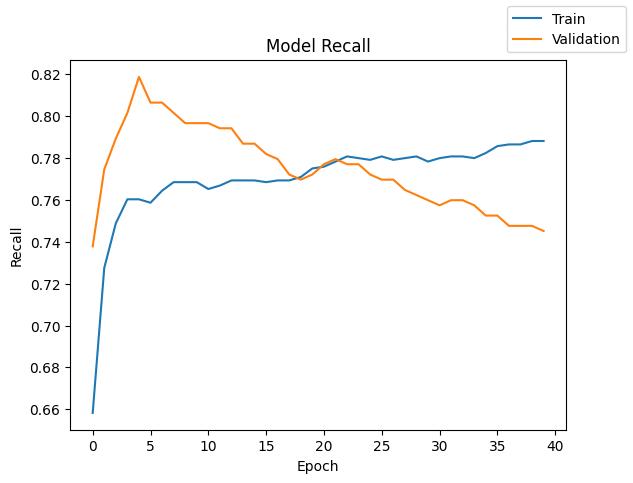

In [302]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(1,activation="sigmoid"))
optimizer_2 = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
build_model(model_2, optimizer_2, X_train, y_train)
model_2_train_perf_name = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf_name

In [303]:
model_2_val_perf_name = model_performance_classification(model_2, X_val, y_val)
model_2_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767,0.767,0.843616,0.786743


### Neural Network with Adam Optimizer and Dropout

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Total time taken for the model to run  ==>  26.442054510116577  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8015,0.8015,0.841567,0.814049


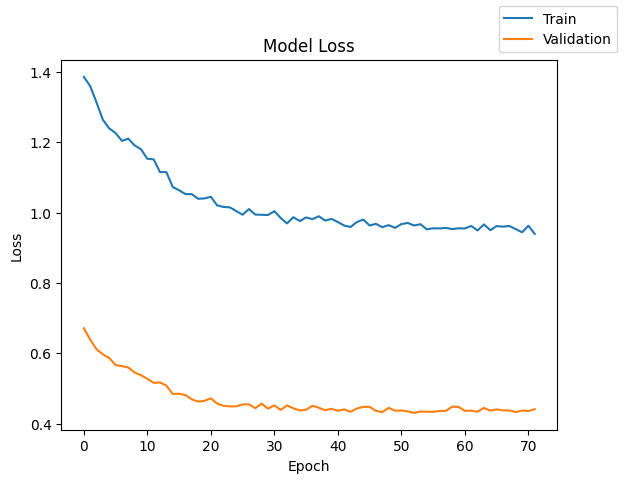

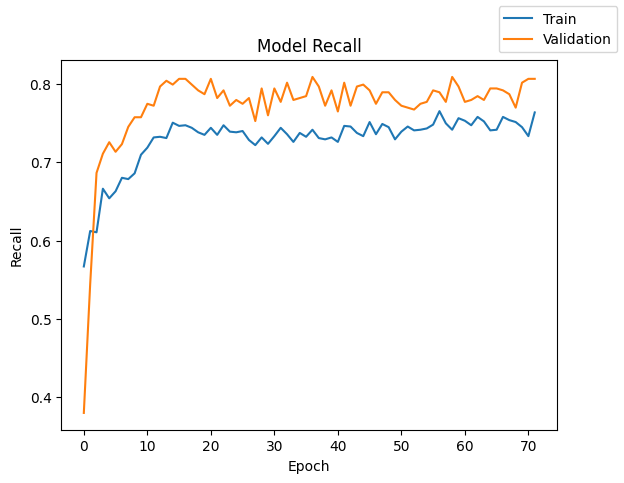

In [304]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64,activation="sigmoid",input_dim=X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(32,activation="relu"))
model_3.add(Dense(16,activation="relu"))
model_3.add(Dropout(0.2))
model_3.add(Dense(1,activation="sigmoid"))
optimizer_3 = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
build_model(model_3, optimizer_3, X_train, y_train)
model_3_train_perf_name = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf_name



In [305]:
model_3_val_perf_name = model_performance_classification(model_3, X_val, y_val)
model_3_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.807,0.807,0.855931,0.820705


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [306]:
X_train.shape

(6000, 11)

In [307]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9556, 11)
After UpSampling, the shape of train_y: (9556,) 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,809 (14.88 KB)

 Trainable params: 3,665 (14.32 KB)

 Non-trainable params: 144 (576.00 B)

Total time taken for the model to run  ==>  39.31926202774048  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.677899,0.677899,0.754557,0.651675


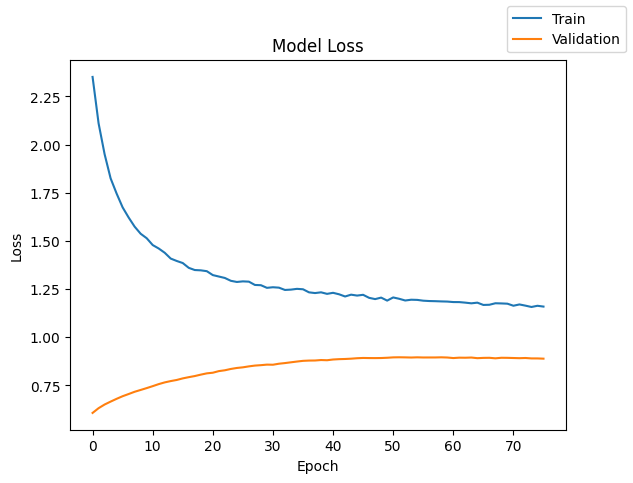

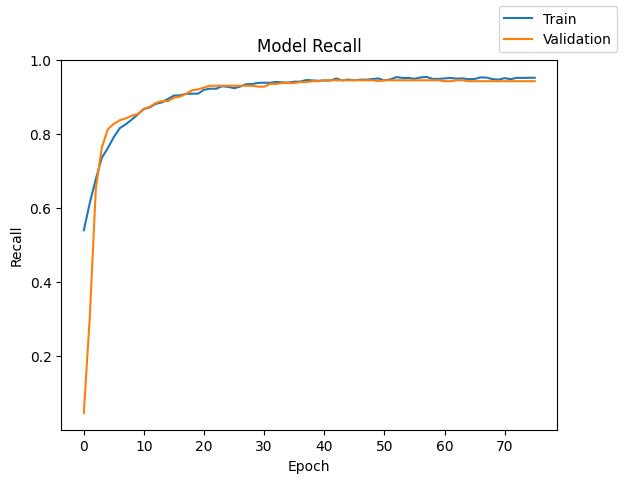

In [328]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(64,activation="relu",input_dim=X_train_smote.shape[1]))
model_4.add(BatchNormalization()) ## Used Batch Normalization
model_4.add(Dropout(0.2)) ## Used Drop outs
model_4.add(Dense(32,activation="elu"))
model_4.add(Dense(16,activation="relu"))
model_4.add(Dense(8,activation="sigmoid"))
model_4.add(BatchNormalization())
model_4.add(Dense(1,activation="sigmoid"))
optimizer_4 = tf.keras.optimizers.SGD(0.0005)    # defining SGD as the optimizer to be used with lr
build_model(model_4, optimizer_4, X_train_smote, y_train_smote)
model_4_train_perf_name = model_performance_classification(model_4, X_train_smote, y_train_smote)
model_4_train_perf_name

In [329]:
model_4_val_perf_name = model_performance_classification(model_4, X_val, y_val)
model_4_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5025,0.5025,0.826623,0.530439


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,809 (14.88 KB)

 Trainable params: 3,665 (14.32 KB)

 Non-trainable params: 144 (576.00 B)

Total time taken for the model to run  ==>  31.605223178863525  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.736291,0.736291,0.802097,0.721103


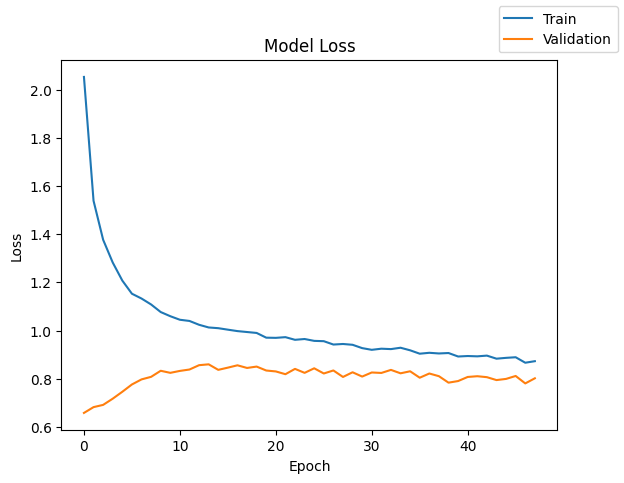

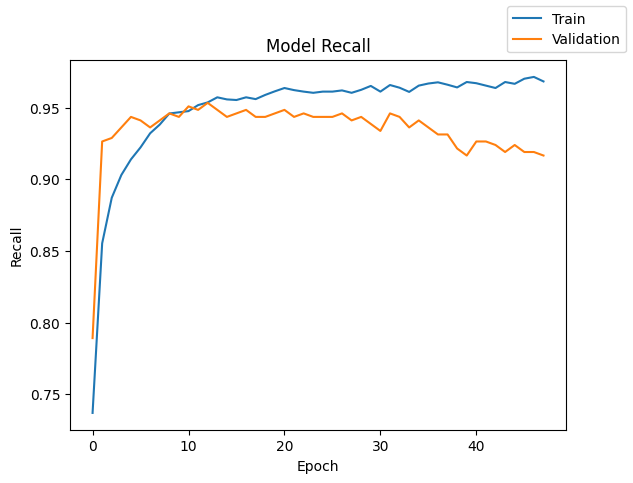

In [310]:
#Initializing the neural network
model_5 = Sequential()
model_5.add(Dense(64,activation="relu",input_dim=X_train_smote.shape[1]))
model_5.add(BatchNormalization()) ## Used Batch Normalization
model_5.add(Dropout(0.2)) ## Used Drop outs
model_5.add(Dense(32,activation="elu"))
model_5.add(Dense(16,activation="relu"))
model_5.add(Dense(8,activation="sigmoid"))
model_5.add(BatchNormalization())
model_5.add(Dense(1,activation="sigmoid"))
optimizer_5 = tf.keras.optimizers.Adam(0.0005)    # defining Adam as the optimizer to be used with lr
build_model(model_5, optimizer_5, X_train_smote, y_train_smote)
model_5_train_perf_name = model_performance_classification(model_5, X_train_smote, y_train_smote)
model_5_train_perf_name

In [311]:

model_5_val_perf_name = model_performance_classification(model_5, X_val, y_val)
model_5_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5635,0.5635,0.839863,0.596299


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,553 (13.88 KB)

 Non-trainable params: 160 (640.00 B)

Total time taken for the model to run  ==>  39.43964695930481  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.699142,0.699142,0.778368,0.676095


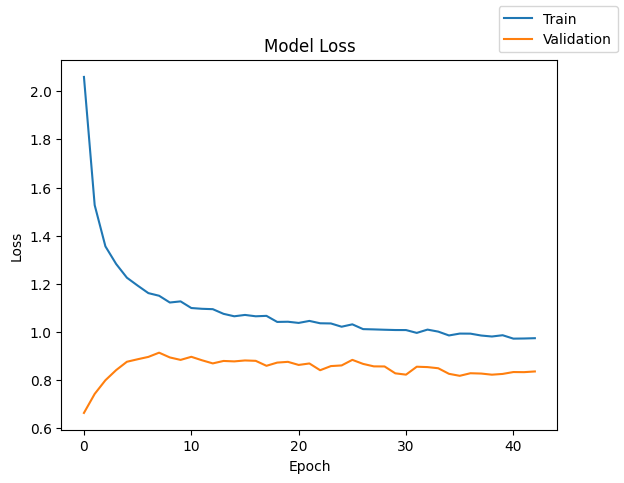

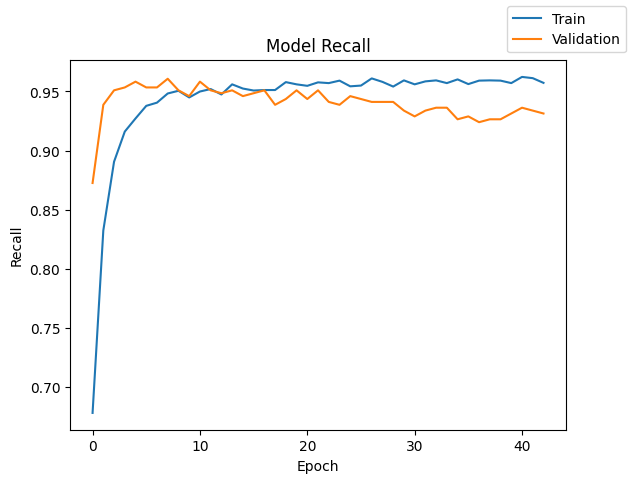

In [312]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(Dense(64,activation="relu",input_dim=X_train_smote.shape[1]))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.4))
model_6.add(Dense(32,activation="elu"))
model_6.add(Dense(16,activation="relu"))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.2))
model_6.add(Dense(1,activation="sigmoid"))
optimizer_6 = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer to be used wiht lr
build_model(model_6, optimizer_6, X_train_smote, y_train_smote)
model_6_train_perf_name = model_performance_classification(model_6, X_train_smote, y_train_smote)
model_6_train_perf_name

In [313]:
model_6_val_perf_name = model_performance_classification(model_6, X_val, y_val)
model_6_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5085,0.5085,0.834974,0.536102


####Other Models

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 28 (112.00 B)

Total time taken for the model to run  ==>  13.080358266830444  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.2455,0.2455,0.750127,0.159633


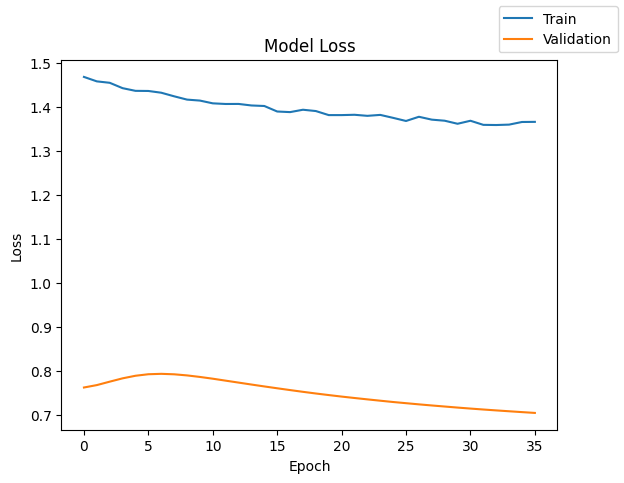

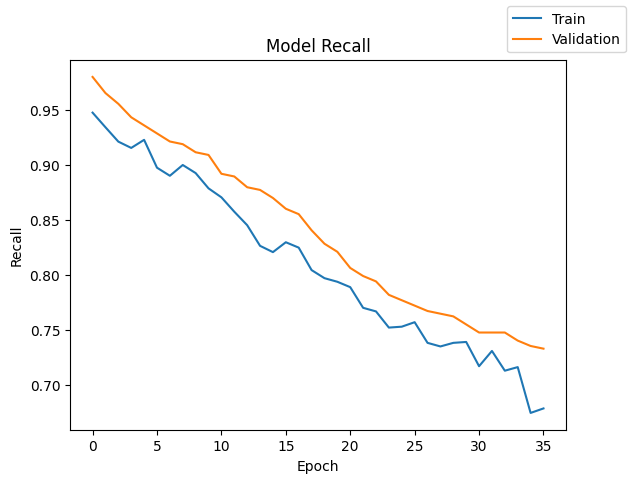

In [314]:
#Initializing the neural network
model_7 = Sequential()
model_7.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Dense(7,activation="relu"))
model_7.add(Dense(1,activation="sigmoid"))
optimizer_7 = tf.keras.optimizers.SGD(0.0005)    # defining SGD as the optimizer to be used with lr
build_model(model_7, optimizer_7, X_train, y_train)
model_7_train_perf_name = model_performance_classification(model_7, X_train, y_train)
model_7_train_perf_name

In [315]:
model_7_val_perf_name = model_performance_classification(model_7, X_val, y_val)
model_7_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.2585,0.2585,0.788576,0.179967


NewModels


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 28 (112.00 B)

Total time taken for the model to run  ==>  19.132951021194458  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.766167,0.766167,0.830221,0.784528


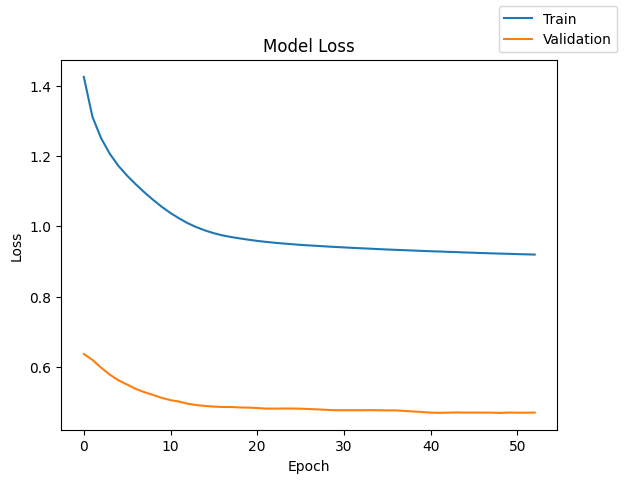

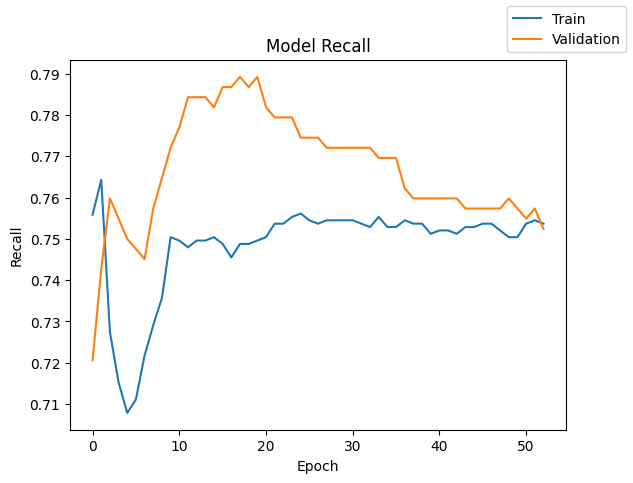

In [316]:
#Initializing the neural network
model_8 = Sequential()
model_8.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_8.add(BatchNormalization())
model_8.add(Dense(7,activation="relu"))
model_8.add(Dense(1,activation="sigmoid"))
optimizer_8 = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer to be used with lr
build_model(model_8, optimizer_8, X_train, y_train)
model_8_train_perf_name = model_performance_classification(model_8, X_train, y_train)
model_8_train_perf_name

In [317]:
model_8_val_perf_name = model_performance_classification(model_8, X_val, y_val)
model_8_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7665,0.7665,0.836659,0.785579


New Model

## Model Performance Comparison and Final Model Selection

New Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Total time taken for the model to run  ==>  19.26400327682495  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.507953,0.507953,0.64817,0.355469


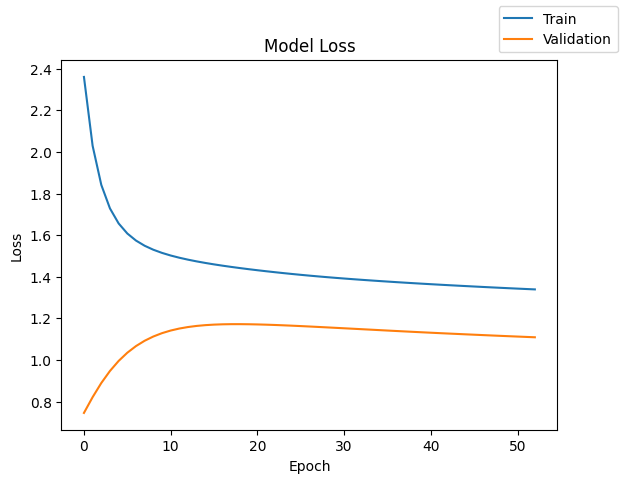

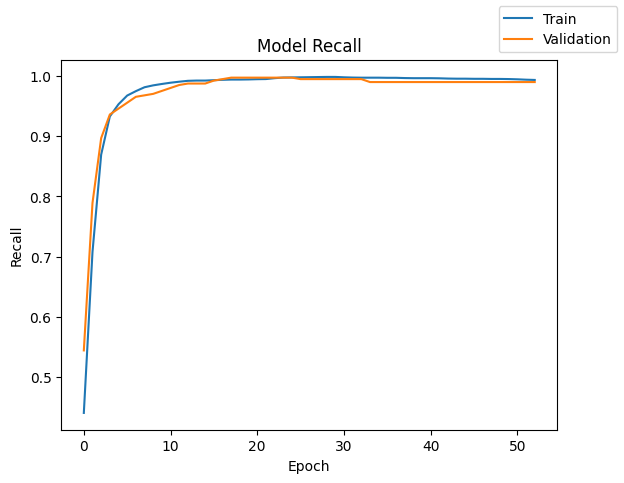

In [318]:
model_1_1 = Sequential()
model_1_1.add(Dense(16,activation='relu',input_dim = X_train_smote.shape[1]))
#model_1_1.add(Dense(64,activation='relu'))
#model_1_1.add(Dense(32,activation='tanh'))
#model_1_1.add(Dense(16,activation='relu'))
model_1_1.add(Dense(1, activation = 'sigmoid'))
optimizer_1_1 = tf.keras.optimizers.SGD(0.001)    # defining SGD as the optimizer to be used with lr
build_model(model_1_1, optimizer_1_1, X_train_smote, y_train_smote)
model_1_1_train_perf_name = model_performance_classification(model_1_1, X_train_smote, y_train_smote)
model_1_1_train_perf_name

In [319]:
model_1_1_val_perf_name = model_performance_classification(model_1_1, X_val, y_val)
model_1_1_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.2265,0.2265,0.821577,0.115014


New Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 256 (1.00 KB)

Total time taken for the model to run  ==>  19.710551261901855  secs
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8115,0.8115,0.847357,0.822807


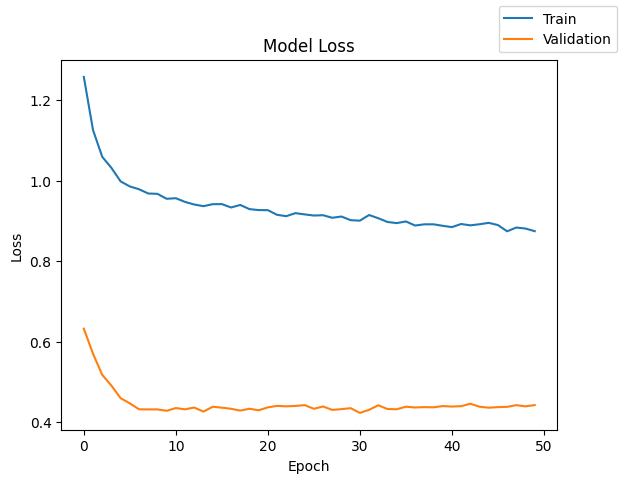

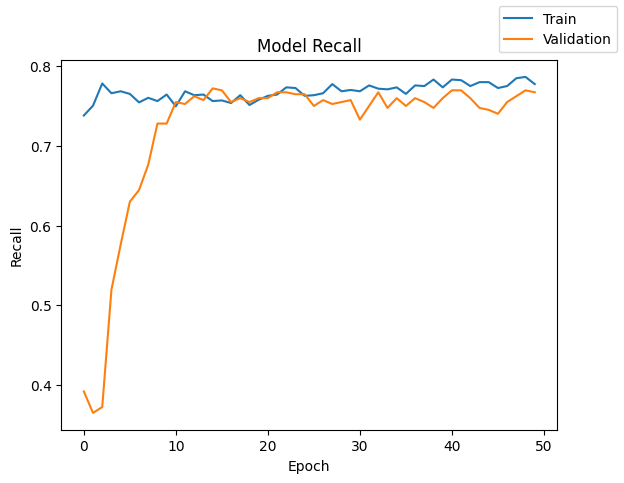

In [320]:
model_1_2 = Sequential()
model_1_2.add(Dense(128,activation='sigmoid',input_dim = X_train.shape[1], kernel_initializer='glorot_normal'))
model_1_2.add(BatchNormalization())
model_1_2.add(Dense(64,activation='relu', kernel_initializer="he_normal"))
model_1_2.add(Dropout(0.3))
model_1_2.add(Dense(32,activation='sigmoid', kernel_initializer='glorot_normal'))
model_1_2.add(Dense(16,activation='relu', kernel_initializer="he_normal"))
model_1_2.add(Dense(1, activation = 'sigmoid', kernel_initializer='glorot_normal'))
optimizer_1_2 = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer to be used with lr
build_model(model_1_2, optimizer_1_2, X_train, y_train)
model_1_2_train_perf_name = model_performance_classification(model_1_2, X_train, y_train)
model_1_2_train_perf_name

In [321]:
model_1_2_val_perf_name = model_performance_classification(model_1_2, X_val, y_val)
model_1_2_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7955,0.7955,0.843764,0.809745


New Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 16 (64.00 B)

Total time taken for the model to run  ==>  19.602561950683594  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.614692,0.614692,0.726372,0.560484


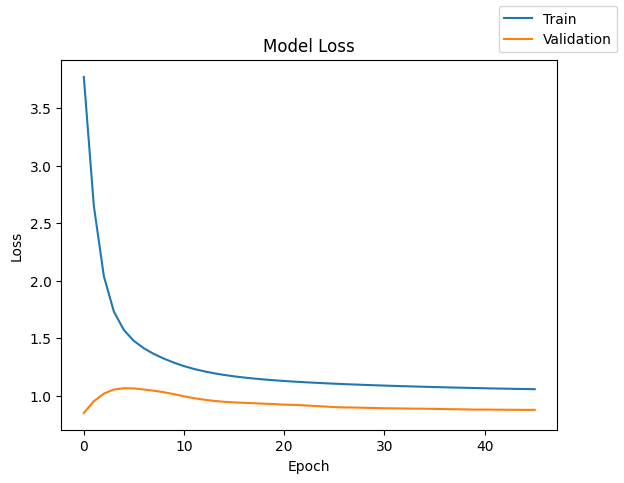

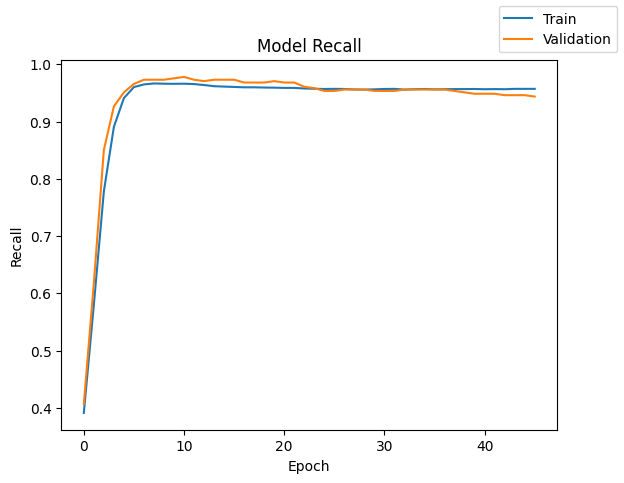

In [322]:
model_13 = Sequential()
model_13.add(Dense(8,activation='relu',input_dim = X_train_smote.shape[1], kernel_initializer='glorot_normal'))
model_13.add(BatchNormalization())
model_13.add(Dense(16,activation='relu', kernel_initializer="he_normal"))
model_13.add(Dense(1, activation = 'sigmoid', kernel_initializer='glorot_normal'))
optimizer_13 = tf.keras.optimizers.Adam(0.0005)    # defining Adam as the optimizer to be used with lr
build_model(model_13, optimizer_13, X_train_smote, y_train_smote)
model_13_train_perf_name = model_performance_classification(model_13, X_train_smote, y_train_smote)
model_13_train_perf_name



In [323]:
model_13_val_perf_name = model_performance_classification(model_13, X_val, y_val)
model_13_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.402,0.402,0.830017,0.403057


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,585 (6.19 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 128 (512.00 B)

Total time taken for the model to run  ==>  20.603599071502686  secs
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.583298,0.583298,0.707068,0.510091


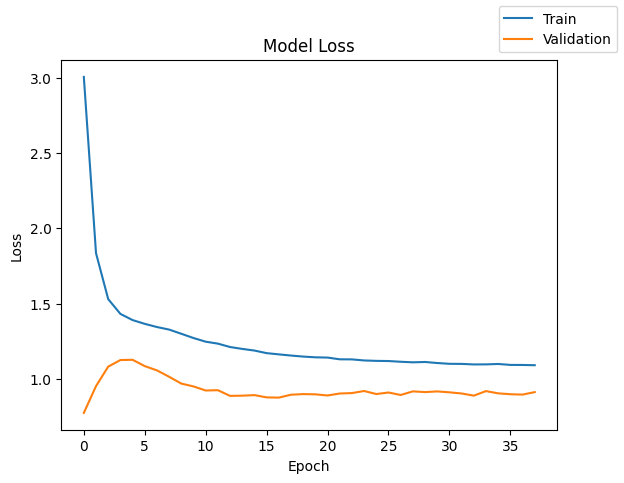

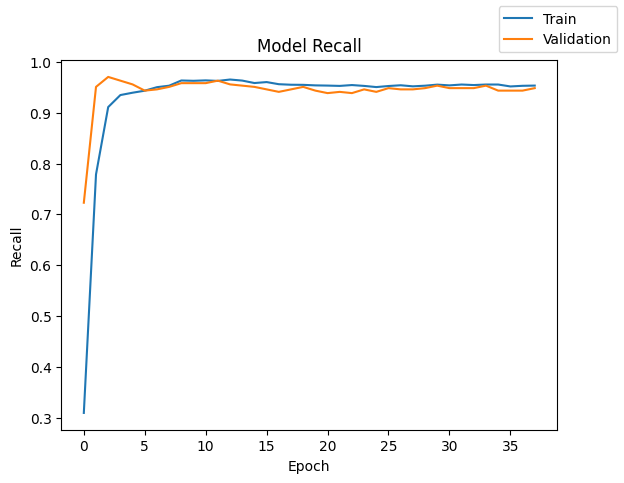

In [324]:
model_14 = Sequential()
model_14.add(Dense(64,activation='tanh',input_dim = X_train_smote.shape[1], kernel_regularizer=L2(0.01)))
model_14.add(BatchNormalization())
model_14.add(Dropout(0.2))
model_14.add(Dense(8,activation='sigmoid'))
model_14.add(Dense(4,activation='relu', kernel_initializer="he_normal"))
model_14.add(Dense(1, activation = 'sigmoid'))
optimizer_14 = tf.keras.optimizers.Adam(0.001)    # defining Adam as the optimizer to be used with lr
build_model(model_14, optimizer_14, X_train_smote, y_train_smote)
model_14_train_perf_name = model_performance_classification(model_14, X_train_smote, y_train_smote)
model_14_train_perf_name

In [325]:
model_14_val_perf_name = model_performance_classification(model_14, X_val, y_val)
model_14_val_perf_name

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.3495,0.3495,0.813619,0.330145


## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___